# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [2]:
import pandas as pd

In [42]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [4]:
facts['Pop_dens']=facts['Pop_2020']/facts['Area_land']

In [5]:
facts[['State', 'Pop_dens']].sort_values(by='Pop_dens',ascending=False).head()

,State,Pop_dens
9,District of Columbia,4364.208861
32,New Jersey,487.688035
43,Rhode Island,409.775579
42,Puerto Rico,370.531574
23,Massachusetts,347.981239


In [6]:
facts['water']=facts['Area_land']-facts['Area_water']

In [7]:
facts[['State', 'water']].sort_values(by='water').head()

,State,water
37,Northern Mariana Islands,-4172
48,United States Virgin Islands,-1202
2,American Samoa,-1109
12,Guam,-392
9,District of Columbia,139


In [56]:
facts['popu']=facts['Pop_2020']-facts['Pop_2010']

In [58]:
facts[['State', 'popu']].sort_values(by='popu',ascending=False).head(10)

,State,popu
47,Texas,3999944.0
10,Florida,2736877.0
5,California,2284267.0
11,Georgia,1024255.0
52,Washington,980741.0
35,North Carolina,903905.0
34,New York,823147.0
3,Arizona,759485.0
6,Colorado,744518.0
51,Virginia,630369.0


In [139]:
facts[['State', 'Pop_2020', 'State_bird']].sort_values(by='Pop_2020',ascending=False).head(1)
facts_1=facts.groupby(['State_bird']).Pop_2020.sum().reset_index()

In [142]:
print(facts_1.sort_values(by='Pop_2020',ascending=False).head(1))

               State_bird    Pop_2020
25  Northern mockingbird   63567335.0


In [143]:
facts[['State', 'Area_land', 'State_bird']].sort_values(by='Area_land',ascending=False).head(1)

,State,Area_land,State_bird
1,Alaska,1477953,Willow ptarmigan


In [16]:
facts[['State', 'Capital', 'Capital_pop', 'City_1', 'city_1_pop']].sort_values(by='Capital_pop',ascending=False).head()

,State,Capital,Capital_pop,City_1,city_1_pop
3,Arizona,Phoenix,1680992,Phoenix,1660272
47,Texas,Austin,978908,Houston,2325502
38,Ohio,Columbus,898553,Columbus,895477
16,Indiana,Indianapolis,876384,Indianapolis,867125
6,Colorado,Denver,727211,Denver,719238


21 Entities capitals are there biggest cities

In [72]:
facts['percent_drop']=facts['city_1_pop']-facts['city_5_pop']

In [77]:
facts['percent_drop_1']=facts['percent_drop']/facts['city_1_pop']*100

In [79]:
facts[['City_1', 'percent_drop_1']].sort_values(by='percent_drop_1',ascending=False).head()

,City_1,percent_drop_1
34,New York City,98.392453
1,Anchorage,97.034006
15,Chicago,94.585132
41,Philadelphia,94.426663
19,Louisville,93.495419


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [80]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

In [103]:
stat = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
stat.head()

,Name,Date,Status,Abbreviation
0,Alabama,"December 14, 1819",State,AL
1,Alaska,"January 3, 1959",State,AK
2,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,"February 14, 1912",State,AZ
4,Arkansas,"June 15, 1836",State,AR


In [106]:
stat['Date'] = pd.to_datetime(stat['Date'])
stat.head()

,Name,Date,Status,Abbreviation
0,Alabama,1819-12-14,State,AL
1,Alaska,1959-01-03,State,AK
2,American Samoa,1900-04-17,Territory,AS
3,Arizona,1912-02-14,State,AZ
4,Arkansas,1836-06-15,State,AR


In [100]:
stat_new = stat.rename(columns={'Date': 'datetime'})

In [102]:
stat_new.head()

,Name,datetime,Status,Abbreviation
0,Alabama,"December 14, 1819",State,AL
1,Alaska,"January 3, 1959",State,AK
2,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,"February 14, 1912",State,AZ
4,Arkansas,"June 15, 1836",State,AR


In [107]:
stat_data = pd.merge(facts,stat,left_on='USPS_code',right_on='Abbreviation',how='outer')

In [110]:
stat_data = stat_data.drop('Name',1)

In [112]:
stat_data.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_4,city_4_pop,City_5,city_5_pop,percent_drop,popu,percent_drop_1,Date,Status,Abbreviation
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Mobile,189572.0,Tuscaloosa,101113.0,107815.0,244543.0,51.603902,1819-12-14,State,AL
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Wasilla,10529.0,Sitka,8647.0,282891.0,23160.0,97.034006,1959-01-03,State,AK
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,'Ili'ili,3195.0,Pava'ia'i,2450.0,5495.0,-6082.0,69.162996,1900-04-17,Territory,AS
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Chandler,257165.0,Scottsdale,255310.0,1404962.0,759485.0,84.622399,1912-02-14,State,AZ
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Springdale,81029.0,Jonesboro,76990.0,120891.0,95606.0,61.092778,1836-06-15,State,AR


In [114]:
stat_data[['Date', 'State_flower', 'State']].sort_values(by='Date',ascending=True).head(15)

,Date,State_flower,State
8,1787-12-07,Peach blossom,Delaware
41,1787-12-12,Mountain laurel,Pennsylvania
32,1787-12-18,Violet,New Jersey
11,1788-01-02,Cherokee rose,Georgia
7,1788-01-09,Mountain laurel,Connecticut
23,1788-02-06,Mayflower,Massachusetts
22,1788-04-28,Black-eyed susan,Maryland
44,1788-05-23,Yellow jessamine,South Carolina
31,1788-06-21,Purple lilac,New Hampshire
51,1788-06-25,American dogwood,Virginia


Mountain Laurel

In [116]:
stat_data['Pop_dens']=stat_data['Pop_2020']/stat_data['Area_land']

In [118]:
stat_data[['State', 'Pop_dens', 'Status']].sort_values(by='Pop_dens',ascending=True).head()

,State,Pop_dens,Status
37,Northern Mariana Islands,0.108051,Territory
12,Guam,0.310129,Territory
1,Alaska,0.496221,State
55,Wyoming,2.293916,State
28,Montana,2.876218,State


Puerto Rico has a larger population density than Alaska which is the least dense state. 

In [126]:
stat_data_1 = stat_data[['Abbreviation', 'Date', 'city_1_pop', 'Area_land', 'Area_water']].sort_values(by='Date',ascending=True)

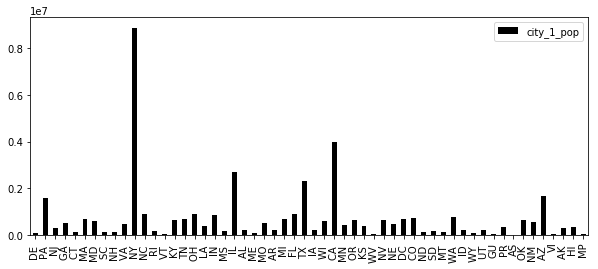

In [128]:
plot = stat_data_1[['city_1_pop','Abbreviation',]].plot(kind='bar',figsize=(10,4),color='black')
plot.set_xticklabels(stat_data_1['Abbreviation']);

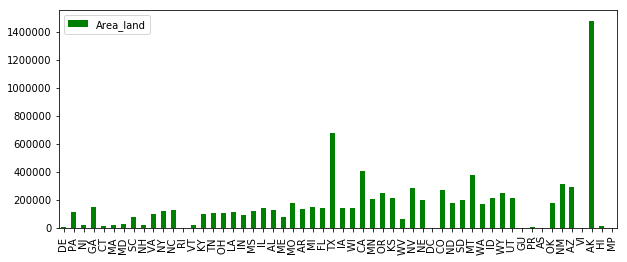

In [129]:
plot_1 = stat_data_1[['Area_land','Abbreviation',]].plot(kind='bar',figsize=(10,4),color='green')
plot_1.set_xticklabels(stat_data_1['Abbreviation']);

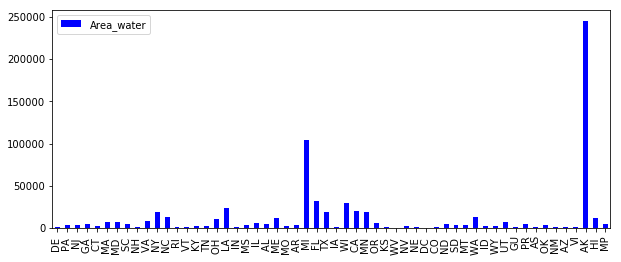

In [130]:
plot_2 = stat_data_1[['Area_water','Abbreviation',]].plot(kind='bar',figsize=(10,4),color='blue')
plot_2.set_xticklabels(stat_data_1['Abbreviation']);